# Introdução

O algoritmo Smith-Waterman é um dos algoritmos mais importantes para alinhamento local de sequências biológicas, como DNA ou RNA, ou seja, determina se duas sequências biológicas possuem um fragmento em comum, ou são de grande similaridade biológica, levando em consideração possíveis mutações, inserções ou deleções de elementos dentro de uma string.


# Algoritmo Smith-Waterman

A programção dinâmica é utilizada para facilitar a construção e preenchimento da matriz de escore de alinhamento local.
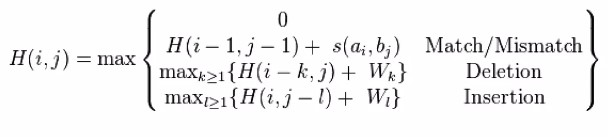

- H é a matriz e H(i, j) é um elemento da linha "i" e coluna "j".
- H(i-1, j-1) é o elemento da linha (i-1) e coluna (j-1).
- s(ai, bj) é uma função de similaridade com valores definidos pelo usuário, se forem iguais (match) recebe o valor de match, caso contrário (missmatch) recebe o valor missmach.
- H(i-k, j) é o elemento (célula) acima.
- H(i, j-l) é o elemento (célula) a esquerda.
- Wk e Wl (gap penalty) representam uma penalidade por lacuna.

# Código para alinhamento local

## Valores para match, missmatch e gap

In [58]:
match_score = 5
mismatch_score = -3
gap_score = -4

## Desenvolvimento do código

### Iniciar tabela

In [59]:
def init_table(dimension):

    m, n = dimension[0], dimension[1]

    table = [[0 for _ in range(0, n)] for _ in range(0, m)]
    pointer_table = [[0 for _ in range(0, n-1)] for _ in range(0, m-1)]

    k, q = 0, 0
    for i in range(0, m):
        table[i][0] = k
        k = k - 2

    for i in range(0, n):
        table[0][i] = q
        q = q - 2

    return pointer_table, table

### Comparação Nucleotídeos

In [60]:
def nucleotideComparison(nucleotide_1, nucleotide_2):

    if nucleotide_1 == nucleotide_2:
        return match_score

    if nucleotide_1 != nucleotide_2:
        return mismatch_score

    if nucleotide_1 == "_" or nucleotide_2 == "_":
        return gap_score

### Backtracking

In [61]:
def backTracking(pointer_table, seq1, seq2):

    m, n = len(seq1) -1, len(seq2) - 1

    seq_align_1 = ""
    seq_align_2 = ""

    while True:

        if pointer_table[m][n] == 1:
            n = n - 1
            seq_align_1 = seq_align_1 + '_'
            seq_align_2 = seq_align_2 + seq2[n + 1]

        elif pointer_table[m][n] == 2:
            m = m - 1
            seq_align_1 = seq_align_1 + seq1[m + 1]
            seq_align_2 = seq_align_2 + '_'

        elif pointer_table[m][n] == 3:
            m = m - 1
            n = n - 1
            seq_align_1 = seq_align_1 + seq1[m + 1]
            seq_align_2 = seq_align_2 + seq2[n + 1]

        if m == -1 or n == -1:
            break

    seq_align_1 = seq_align_1[::-1]
    seq_align_2 = seq_align_2[::-1]

    print("ALINHAMENTO DAS SEQUÊNCIAS: ")
    print(f"Sequência 1: {seq_align_1}")
    print(f"Sequência 2: {seq_align_2}\n")

### Smith-Waterman

In [62]:
def smith_waterman(seq1, seq2):

    m, n = len(seq1), len(seq2)

    return_list = init_table((m + 1, n + 1))
    pointer_table, table = return_list[0], return_list[1]

    for l in range(1, m + 1):

        for c in range(1, n + 1):
            up_score = table[l - 1][c] + gap_score
            side_score = table[l][c - 1] + gap_score
            diagonal_score = table[l - 1][c - 1] + nucleotideComparison(seq1[l - 1], seq2[c - 1])
            score = max(up_score, side_score, diagonal_score)

            if score == 0:
                pointer_table[l - 1][c - 1] = 0
            if score == side_score:
                pointer_table[l - 1][c - 1] = 1
            if score == up_score:
                pointer_table[l - 1][c - 1] = 2
            if score == diagonal_score:
                pointer_table[l - 1][c - 1] = 3

            table[l][c] = score

    backTracking(pointer_table, seq1, seq2)

    print(f"ESCORE FINAL: {table[m][n]}\n")
    print("MATRIZ DE ESCORE: \n")

    for i in range(0, m + 1):
      for j in range(0, n + 1):
        print(f"\t{table[i][j]} ", end="")

      print()

## Teste de alinhamento de sequências

In [63]:
seq1 = "GAATTCAGAATTC"
seq2 = "GACTTAGACTTAC"

smith_waterman(seq1, seq2)

ALINHAMENTO DAS SEQUÊNCIAS: 
Sequência 1: GAATTCAGAATT_C
Sequência 2: GACTT_AGACTTAC

ESCORE FINAL: 36

MATRIZ DE ESCORE: 

	0 	-2 	-4 	-6 	-8 	-10 	-12 	-14 	-16 	-18 	-20 	-22 	-24 	-26 
	-2 	5 	1 	-3 	-7 	-11 	-13 	-7 	-11 	-15 	-19 	-23 	-25 	-27 
	-4 	1 	10 	6 	2 	-2 	-6 	-10 	-2 	-6 	-10 	-14 	-18 	-22 
	-6 	-3 	6 	7 	3 	-1 	3 	-1 	-5 	-5 	-9 	-13 	-9 	-13 
	-8 	-7 	2 	3 	12 	8 	4 	0 	-4 	-8 	0 	-4 	-8 	-12 
	-10 	-11 	-2 	-1 	8 	17 	13 	9 	5 	1 	-3 	5 	1 	-3 
	-12 	-13 	-6 	3 	4 	13 	14 	10 	6 	10 	6 	2 	2 	6 
	-14 	-15 	-8 	-1 	0 	9 	18 	14 	15 	11 	7 	3 	7 	3 
	-16 	-9 	-12 	-5 	-4 	5 	14 	23 	19 	15 	11 	7 	3 	4 
	-18 	-13 	-4 	-8 	-8 	1 	10 	19 	28 	24 	20 	16 	12 	8 
	-20 	-17 	-8 	-7 	-11 	-3 	6 	15 	24 	25 	21 	17 	21 	17 
	-22 	-21 	-12 	-11 	-2 	-6 	2 	11 	20 	21 	30 	26 	22 	18 
	-24 	-25 	-16 	-15 	-6 	3 	-1 	7 	16 	17 	26 	35 	31 	27 
	-26 	-27 	-20 	-11 	-10 	-1 	0 	3 	12 	21 	22 	31 	32 	36 


In [64]:
seq1 = "GAATTCAGTTA"
seq2 = "GGATCGA"

smith_waterman(seq1, seq2)

ALINHAMENTO DAS SEQUÊNCIAS: 
Sequência 1: GAATTCAGTTA
Sequência 2: GGA_TC_G__A

ESCORE FINAL: 11

MATRIZ DE ESCORE: 

	0 	-2 	-4 	-6 	-8 	-10 	-12 	-14 
	-2 	5 	3 	-1 	-5 	-9 	-5 	-9 
	-4 	1 	2 	8 	4 	0 	-4 	0 
	-6 	-3 	-2 	7 	5 	1 	-3 	1 
	-8 	-7 	-6 	3 	12 	8 	4 	0 
	-10 	-11 	-10 	-1 	8 	9 	5 	1 
	-12 	-13 	-14 	-5 	4 	13 	9 	5 
	-14 	-15 	-16 	-9 	0 	9 	10 	14 
	-16 	-9 	-10 	-13 	-4 	5 	14 	10 
	-18 	-13 	-12 	-13 	-8 	1 	10 	11 
	-20 	-17 	-16 	-15 	-8 	-3 	6 	7 
	-22 	-21 	-20 	-11 	-12 	-7 	2 	11 
